### Import the necessary libraries.

In [1]:
import pandas as pd

from rdkit.Chem import PandasTools
from rdkit.Chem import Draw

import matplotlib.pyplot as plt
import matplotlib_tools as mpt

### Load the file.

In [2]:
df = pd.read_csv("macrolactone.csv")
df.head(3)

,IDs,molecule_pref_name,max_pChEMBL,max_pChEMBL_target,# Target Organisms,Target Organisms,# Known Targets,Known Targets,target_pref_name,smiles
0,CHEMBL94657,PATUPILONE,10.67,CHEMBL1075590,695,"Sus scrofa, Mus musculus, None, Plasmodium fal...",695,"CHEMBL612519, CHEMBL614129, CHEMBL1075484, CHE...","AGS, NCI-H1703, MKN-7, HT-1080, NCI-H226, Lu-6...",C/C(=C\c1csc(C)n1)[C@@H]1C[C@@H]2O[C@]2(C)CCC[...
1,CHEMBL414883,RADICICOL,9.57,CHEMBL612545,41,"Saccharomyces cerevisiae S288c, Human immunode...",41,"CHEMBL5586, CHEMBL612545, CHEMBL3014, CHEMBL38...","NRK, Tyrosine-protein kinase SRC, 3Y1 cell lin...",C[C@@H]1C[C@H]2O[C@@H]2/C=C\C=C/C(=O)Cc2c(Cl)c...
2,CHEMBL1097700,None,8.55,CHEMBL3587,37,"Homo sapiens, None",37,"CHEMBL1862, CHEMBL3587, CHEMBL1841, CHEMBL3879...","Tyrosine-protein kinase SRC, Tyrosine-protein ...",CNc1cc(O)c2c(c1)/C=C\C[C@H](O)[C@H](O)C(=O)/C=...


### Add a mol column to pandas dataframe.

In [3]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="smiles")

### Sort the dataframe based on # Known Targets.

In [4]:
df.sort_values(by=["# Known Targets"], ascending=False, inplace=True)

,IDs,molecule_pref_name,max_pChEMBL,max_pChEMBL_target,# Target Organisms,Target Organisms,# Known Targets,Known Targets,target_pref_name,smiles,ROMol
0,CHEMBL94657,PATUPILONE,10.67,CHEMBL1075590,695,"Sus scrofa, Mus musculus, None, Plasmodium fal...",695,"CHEMBL612519, CHEMBL614129, CHEMBL1075484, CHE...","AGS, NCI-H1703, MKN-7, HT-1080, NCI-H226, Lu-6...",C/C(=C\c1csc(C)n1)[C@@H]1C[C@@H]2O[C@]2(C)CCC[...,
1,CHEMBL414883,RADICICOL,9.57,CHEMBL612545,41,"Saccharomyces cerevisiae S288c, Human immunode...",41,"CHEMBL5586, CHEMBL612545, CHEMBL3014, CHEMBL38...","NRK, Tyrosine-protein kinase SRC, 3Y1 cell lin...",C[C@@H]1C[C@H]2O[C@@H]2/C=C\C=C/C(=O)Cc2c(Cl)c...,
2,CHEMBL1097700,None,8.55,CHEMBL3587,37,"Homo sapiens, None",37,"CHEMBL1862, CHEMBL3587, CHEMBL1841, CHEMBL3879...","Tyrosine-protein kinase SRC, Tyrosine-protein ...",CNc1cc(O)c2c(c1)/C=C\C[C@H](O)[C@H](O)C(=O)/C=...,
3,CHEMBL19980,BREFELDIN A,7.05,"CHEMBL1293294,CHEMBL1293294,CHEMBL1293277",26,"Plasmodium falciparum, Homo sapiens, None, Rat...",26,"CHEMBL1795094, CHEMBL1947, CHEMBL6110, CHEMBL1...","Ras-related protein Rab-9A, Nuclear receptor s...",C[C@H]1CCC/C=C\[C@@H]2C[C@H](O)C[C@H]2[C@H](O)...,
4,CHEMBL1097999,E-6201,8.09,CHEMBL3879801,26,"Homo sapiens, None",26,"CHEMBL614245, CHEMBL3879801, CHEMBL612545, CHE...","Unchecked, Dual specificity mitogen-activated ...",CCNc1cc(O)c2c(c1)/C=C\C[C@H](O)[C@H](O)C(=O)/C...,

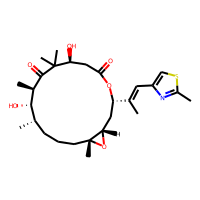
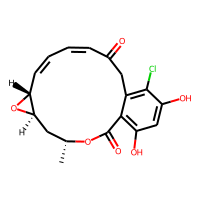
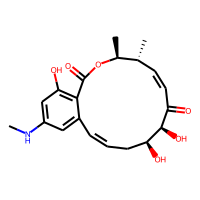
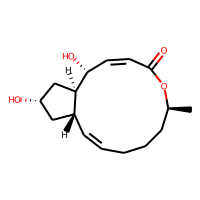
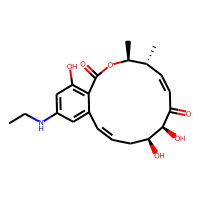

In [5]:
df.head(5)

### Plot the Distribution of # Known Targets

<AxesSubplot:>

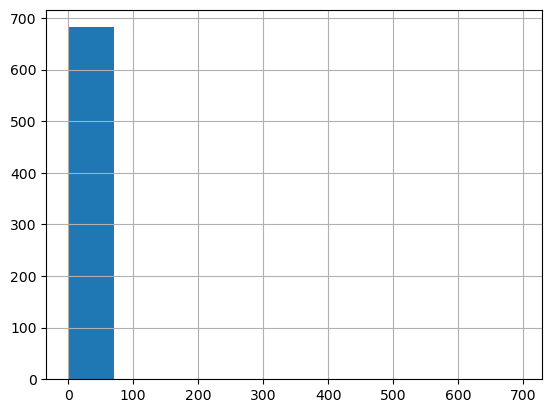

In [6]:
df['# Known Targets'].hist()

### Plot the Distribution of # Known Targets <100

<AxesSubplot:>

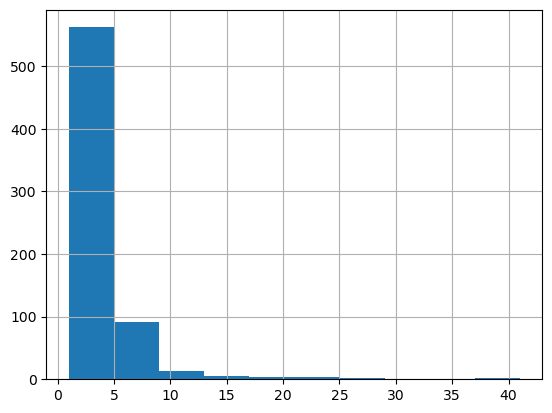

In [7]:
df[df['# Known Targets']<100]['# Known Targets'].hist()

### Barchart Without Images

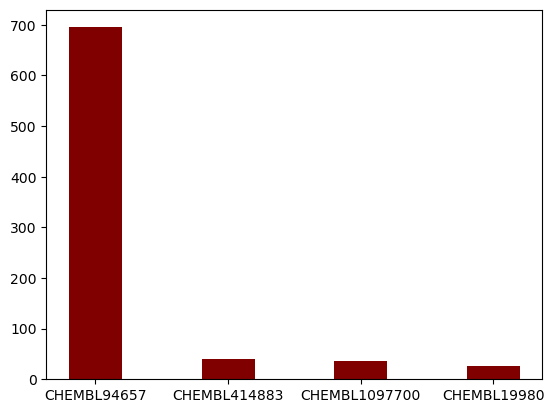

In [8]:
plt.bar(df["IDs"][:4], 
        df['# Known Targets'][:4], 
        color ='maroon',
        width = 0.4)
 
plt.show()

### Subset data based on # Known Targets, and get a list of images.

In [9]:
# subset_data=fragment_df_desc.sort_values(by=["Count"],ascending=False)[:10]

subset_data=df[(df['# Known Targets']>=5) & (df['# Known Targets']<=50)].sort_values(
    by=["# Known Targets"],ascending=False)[:6]

images_col = [Draw.MolToImage(i) for i in subset_data['ROMol']]

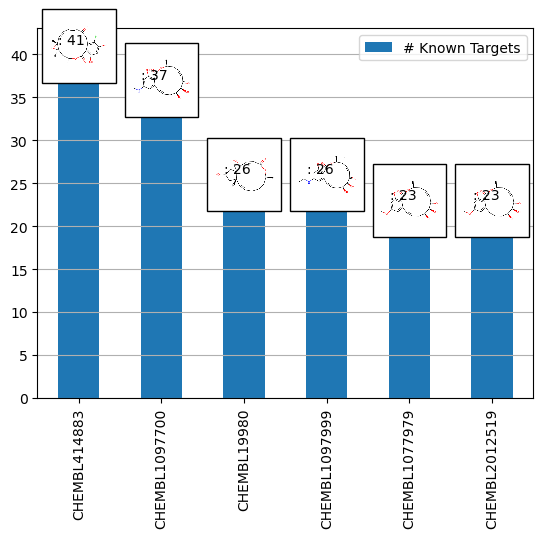

In [10]:
mpt.bar_plot_with_images(df_to_plot = subset_data['# Known Targets'], 
                         img_list = images_col, 
                         bartop_labels = subset_data['# Known Targets'],                          
                         xtick_labels=subset_data["IDs"],
)

In [11]:
plt.rc('font', size=20) #controls default text size
plt.rc('axes', titlesize=20) #fontsize of the title
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
plt.rc('ytick', labelsize=20) #fontsize of the y tick labels
plt.rc('legend', fontsize=20) #fontsize of the legend

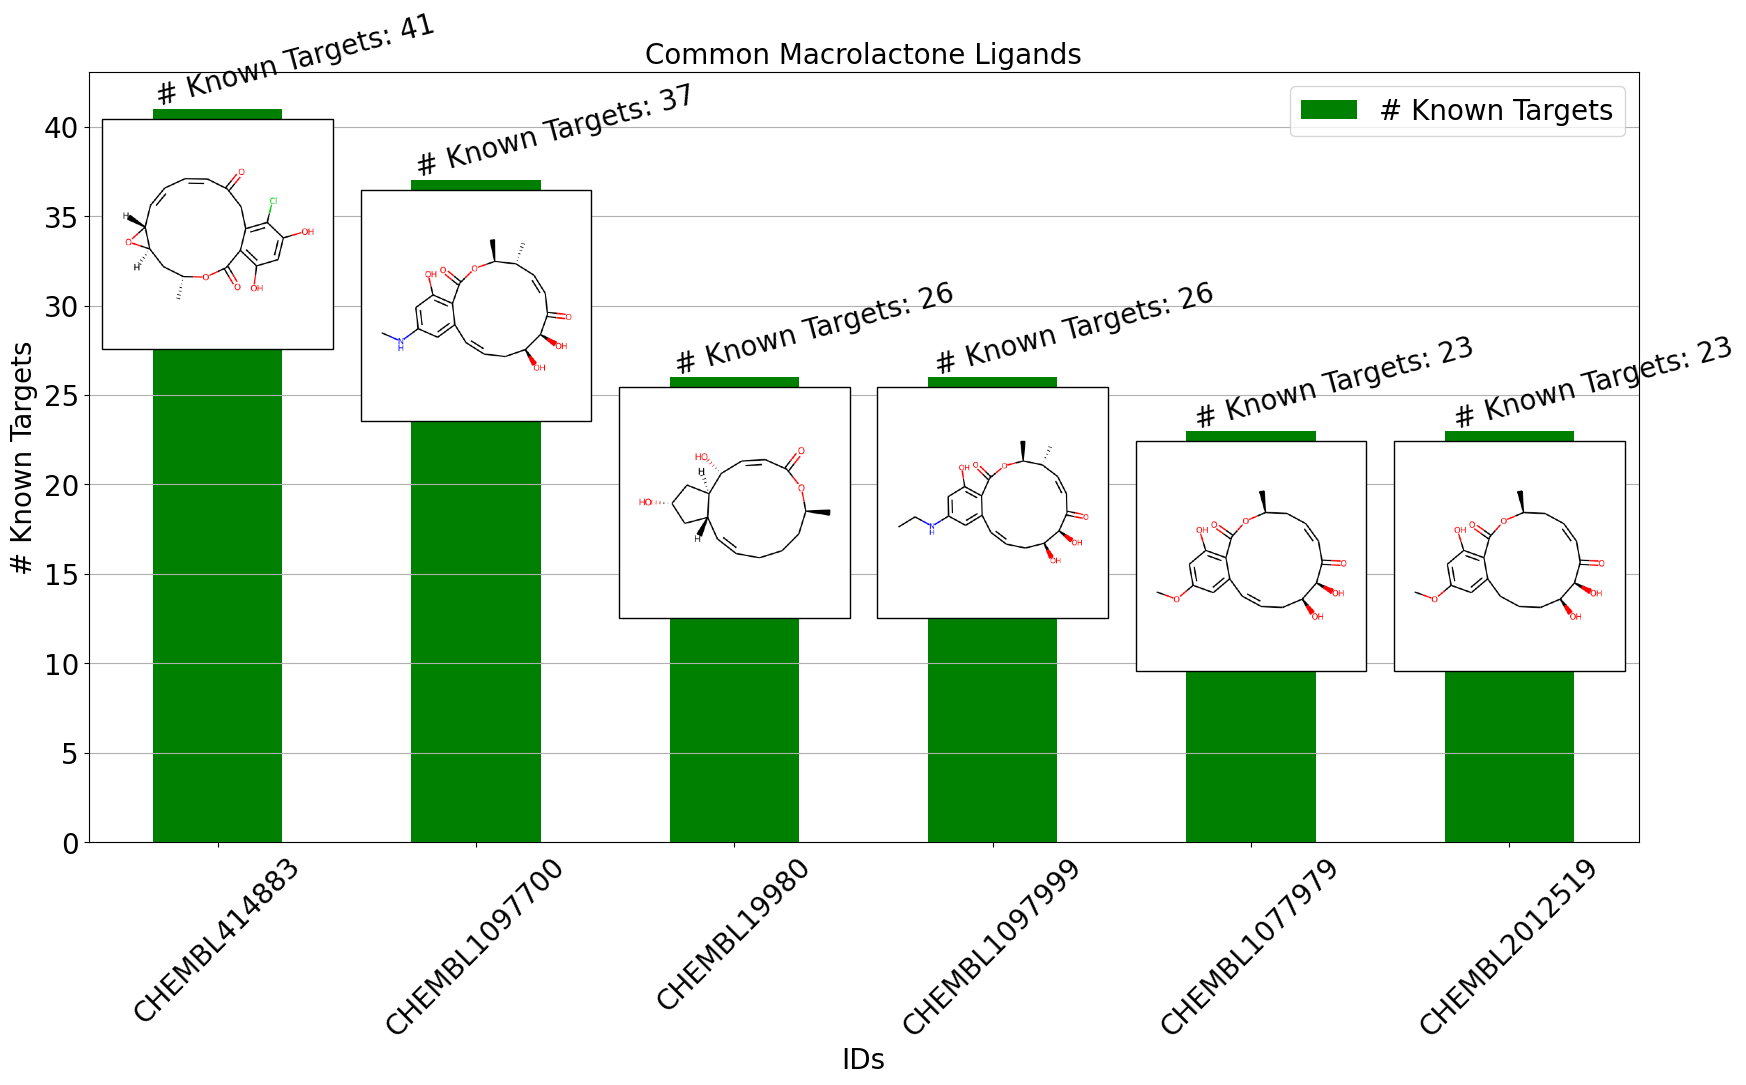

In [12]:
mpt.bar_plot_with_images(df_to_plot = subset_data['# Known Targets'], 
                         img_list = images_col, 
                         bartop_labels = subset_data['# Known Targets'],                          
                         xtick_labels=subset_data["IDs"],
                         bartop_label_pattern='# Known Targets',  
                         orientation='v', 
                         img_scale=0.5,
                         x_offset=0, y_offset=-7,
                         xlabel = "IDs", ylabel = "# Known Targets", 
                         color="green", figsize=(20,10), rot=45, 
                         title = 'Common Macrolactone Ligands',
                         bartop_label_rotation = 15,
)